In [2]:
!pip install tweepy
!pip install pandas
!pip install numpy

In [3]:
!pip install -U pandas-profiling

     |████████████████████████████████| 243 kB 24.5 MB/s 
     |████████████████████████████████| 3.1 MB 37.5 MB/s 
     |████████████████████████████████| 75 kB 6.4 MB/s 
     |████████████████████████████████| 61 kB 8.0 MB/s 
     |████████████████████████████████| 1.1 MB 34.4 MB/s 
     |████████████████████████████████| 295 kB 44.6 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=a5ae21a5fbf88b0270b68338873762a93e7fb6cf9cef322dab0bb1c39620ddc8
  Stored in directory: /home/datalore/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107412 sha256=615639bac350a11215fb514064decad48521e50ced2a6c918facf3a3529be4cd
  Stored in directory: /home/datalore/.cache/pip/wheels/40/98/a3/b654f24edcdcdb87d1f70d65a506fcfdf15289db129c594bcd
Successfully built htmlmin phik
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Unin

In [4]:
import numpy as np
import pandas as pd
import re
import tweepy
import matplotlib.pyplot as plt

In [7]:
consumer_key ="XG4foOdoxRQHZniZx5evBeqYg"
consumer_secret ="8BJKHoYaYNPOXZBAGd3jfUB0Qe1puHSywFIHEtvc86W4TXotMB"
access_token = "844439826707496962-nZxoXH6ThVOUhxzvE3ENOCKMb3idcqy"
access_token_secret= "A9Crz7nUOEAyWC9oKtkcA0WkpglTvKboBDCXUmZSzAuLe"

In [8]:
callback_uri = 'oob'

In [9]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret,callback_uri)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [22]:
search_words = "pandemic"
date_since = "2021-03-11"

In [23]:
tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since).items(1000)
tweets

In [24]:
tweet_details = [[tweet.text, tweet.user.screen_name, tweet.user.location,tweet.created_at ] for tweet in tweets]
tweet_df = pd.DataFrame(data=tweet_details, columns=["text","user","location", "date" ])
tweet_df.head()

,text,user,location,date
0,"@chriswcotner Also, let's not forget what he w...",alan_al_al_alan,"Oklahoma City, OK",2021-03-11 17:26:12
1,RT @GOPChairwoman: Joe Biden repeatedly applau...,DopeySneezy,,2021-03-11 17:26:12
2,@Xero Finds UK Small Businesses Must Utilise ...,Teckexpertsdot1,Lagos NG,2021-03-11 17:26:12
3,"RT @HarjitSajjan: A year ago, COVID-19 was dec...",IKWC1,"Edmonton, Alberta",2021-03-11 17:26:12
4,RT @FilippaLentzos: Always great speaking to @...,brianklaas,"London, England",2021-03-11 17:26:12


In [25]:
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [26]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df['Topic'] = search_words
tweet_df.head(20)

,text,user,location,date,Topic
0,"Also, let's not forget what he was suggesting...",alan_al_al_alan,"Oklahoma City, OK",2021-03-11 17:26:12,pandemic
1,Joe Biden repeatedly applauded Cuomo and Whit...,DopeySneezy,,2021-03-11 17:26:12,pandemic
2,Finds UK Small Businesses Must Utilise Techn...,Teckexpertsdot1,Lagos NG,2021-03-11 17:26:12,pandemic
3,"A year ago, COVID-19 was declared a pandemic....",IKWC1,"Edmonton, Alberta",2021-03-11 17:26:12,pandemic
4,Always great speaking to . Read his excellent...,brianklaas,"London, England",2021-03-11 17:26:12,pandemic
5,#COVID RELIEF: The sweeping #pandemic relief ...,Native_Embassy,,2021-03-11 17:26:11,pandemic
6,"""I have a finite suite of moods, a limited nu...",lbarsk,"Oxford, England",2021-03-11 17:26:11,pandemic
7,Lil sis has COVID. Thankfully its mild and we...,Harlegator68,,2021-03-11 17:26:11,pandemic
8,The same gov't who refused to request an exte...,tartanroots,North Highlands,2021-03-11 17:26:11,pandemic
9,Biden will address a pandemic-weary nation on...,OmkarKumawat2,India,2021-03-11 17:26:11,pandemic


In [15]:
tweet_df.text.duplicated().shape

(1000,)

In [17]:
tweet_df.duplicated(subset=['text']).sum()

275

In [18]:
tweet_df.drop_duplicates(subset=['text'])

,text,user,location,date,Topic
0,RSS always stand with all the areas in India ...,JSunnyrajsinh,,2021-03-04 10:28:28,pandemic
1,Hightown by farm foods national pandemic and t...,jamesr33_,,2021-03-04 10:28:28,pandemic
2,I'm almost certain no one will even come acro...,GraanyJanni,Balloch,2021-03-04 10:28:27,pandemic
3,Professor Stuart Neil isn't a SAGE member but...,TeaCosy6,,2021-03-04 10:28:27,pandemic
4,"My most heartfelt ""FUCK YOU"" for . Thailand, ...",firajja,,2021-03-04 10:28:26,pandemic
...,...,...,...,...,...
991,Most important thing to mention here is th...,BarrackLeo,,2021-03-04 10:22:12,pandemic
992,"Listening to Franck Arnold, MD , who with 30 y...",Wine_GB,,2021-03-04 10:22:11,pandemic
993,"For the first time in 30 years, Montenegro ov...",LaurenDownSouth,"Georgia, USA",2021-03-04 10:22:11,pandemic
994,The Prince of Wales has made a video thanking...,NHSGrampian,"Grampian, Scotland",2021-03-04 10:22:11,pandemic


In [19]:
tweet_df.shape

(1000, 5)

In [27]:
tweet_df.to_csv('tweets_pandemic11march.csv', header=False, mode='a')

In [22]:
!pip install nltk

     |████████████████████████████████| 1.4 MB 23.2 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=77a7db308b1430d4751e13b82f354408d5017f438b44ff1baa19f9e982e95d42
  Stored in directory: /home/datalore/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk


In [23]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/datalore/nltk_data...


In [24]:
tweet_df['sentiment'] = tweet_df['text'].apply(lambda x: sid.polarity_scores(x))
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"
tweet_df['sentiment_overall'] = tweet_df['sentiment'].apply(lambda x: sentimentVerdict(x))
tweet_df.head()

,text,user,location,date,Topic,sentiment,sentiment_overall
0,RSS always stand with all the areas in India ...,JSunnyrajsinh,,2021-03-04 10:28:28,pandemic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,Hightown by farm foods national pandemic and t...,jamesr33_,,2021-03-04 10:28:28,pandemic,"{'neg': 0.23, 'neu': 0.77, 'pos': 0.0, 'compou...",Negative
2,I'm almost certain no one will even come acro...,GraanyJanni,Balloch,2021-03-04 10:28:27,pandemic,"{'neg': 0.056, 'neu': 0.73, 'pos': 0.213, 'com...",Positive
3,Professor Stuart Neil isn't a SAGE member but...,TeaCosy6,,2021-03-04 10:28:27,pandemic,"{'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'comp...",Negative
4,"My most heartfelt ""FUCK YOU"" for . Thailand, ...",firajja,,2021-03-04 10:28:26,pandemic,"{'neg': 0.178, 'neu': 0.672, 'pos': 0.15, 'com...",Negative


In [43]:
tweet_df.to_csv('tweets_lockdownlabelledday2.csv', header=False, mode='a')

In [53]:
positive = tweet_df[tweet_df['sentiment_overall']== 'Positive']

In [54]:
negative = tweet_df[tweet_df['sentiment_overall']== 'Negative']

In [61]:
sentences = tweet_df['text'].tolist()

In [62]:
sentences

[" I can't help but recall that the Republicans in Congress spent nearly $2 trillion for tax giveaways to corporations and th…",
 ' Like bon voyage but in pandemic 😂 they stay at 1 house beside a lake for 1 week and just chill play eat… ',
 ' Pandemic-related school closures may have shifted the gender balance in hospital employment. As of Oct, more women had los…',
 ' Heathrow Airport (mostly owned by govts of China, Qatar and Singapore) laments £2bn loss during the  pandemic; wants govt t…',
 "Why do my friends keep inviting me out to eat or to the move theater??? Isn't there still a deadly pandemic going o… ",
 ' I hope more Black people are choosing rest this season. Between the pandemic and anti-Blackness, we are all surviving a…',
 ' “I’m not traveling we’re in a pandemic” -me explaining why I can’t bring my boyfriend his phone from the other room',
 ' I feel like the start of the Pandemic fucked Glock up ',
 ' Freelancers and the self-employed have been among the hardest hit by 

In [28]:
len(sentences)

200

In [63]:
sentences_as_one_string = " ".join(sentences)

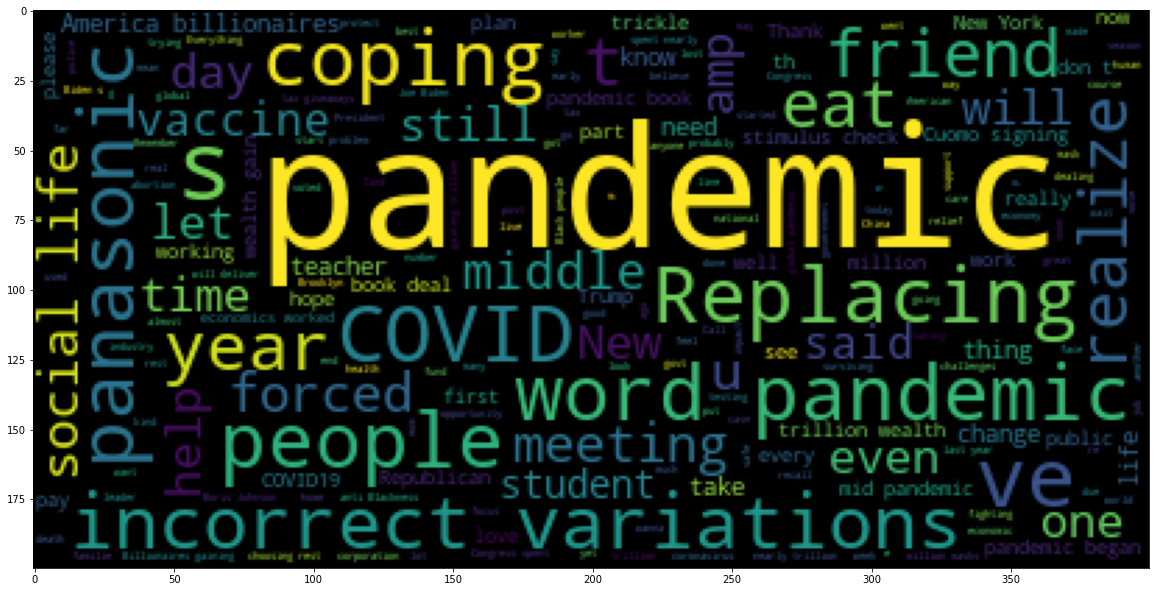

In [64]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [65]:
neg_sentences = negative['text'].tolist()

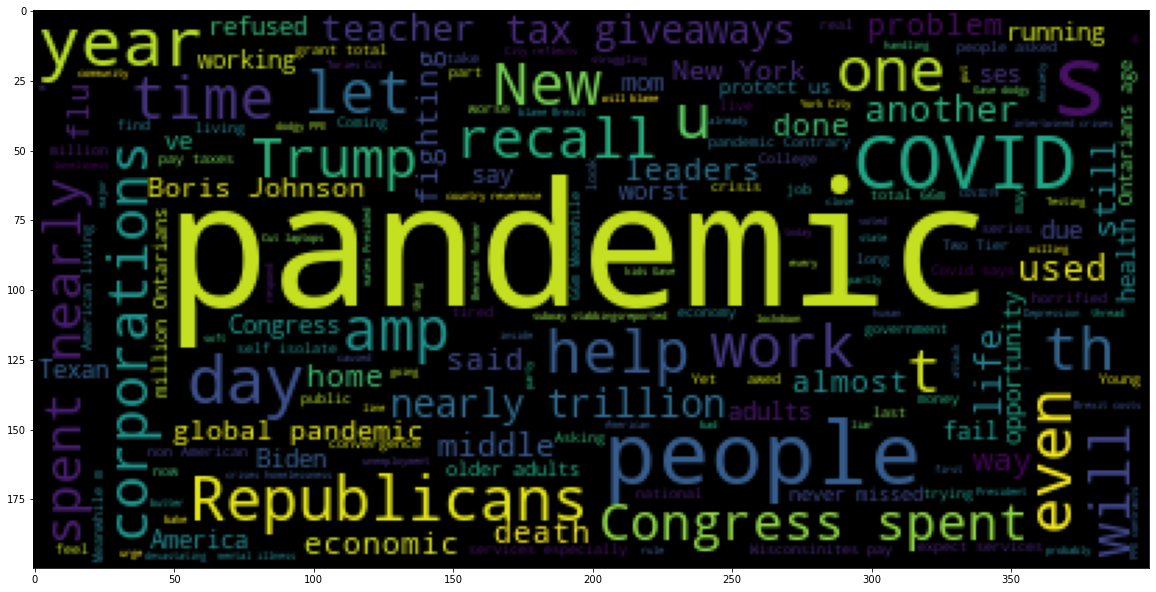

In [66]:
len(neg_sentences)
neg_sentences_as_one_string = " ".join(neg_sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_string))